In [9]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import random_split
import numpy as np
from torch import nn

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

# DATA

In [4]:
train_images = MNIST(root='./data', train=True, download=True)
train_data = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

val_and_test_data = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
val_data, test_data = random_split(val_and_test_data, [5000, 5000])

print(f"training set len: {len(train_data)}")
print(f"val set len: {len(val_data)}")
print(f"test set len: {len(test_data)}")

training set len: 60000
val set len: 5000
test set len: 5000


In [5]:
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True, num_workers=1)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=10, shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True, num_workers=1)

In [6]:
def show_data_samples(data):
    figure = plt.figure(figsize=(14, 7))
    cols, rows = 4, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx]
        figure.add_subplot(rows, cols, i)    
        plt.axis("off")
        plt.imshow(img, cmap="gray")
    plt.show()

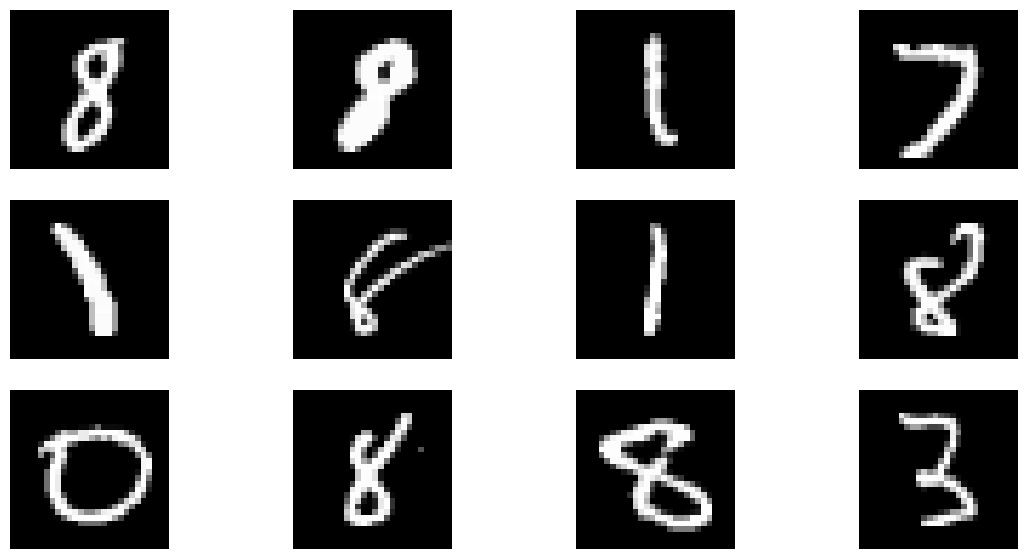

In [7]:
show_data_samples(train_images)

# Model as a function

 ![title](images/black_box.png)

![title](images/function_picture.jpg)

$$ 
  \Huge{f(p_1, p_2, ..., p_{784}) = d}
$$


 $$ 
  \Huge{f(p_1, p_2, ..., p_{784}) = [ o_1, o_2, ..., o_{10} ]}
$$


![title](images/nn.png)

In [15]:
class NeuralNetwork(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential( 
            nn.Flatten(),
            nn.Linear(784, 128),
            nn.ReLU(), # tanh, sigmoid, 
            nn.Linear(128, 64),
            nn.ReLU(), # tanh, sigmoid, 
            nn.Linear(64, 32),
            nn.ReLU(), # tanh, sigmoid, 
            nn.Linear(32, 10)
        )

    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)

# TRAINING

In [16]:
model = NeuralNetwork()

In [17]:
inputs, targets = train_data[0]
model(inputs)

tensor([[-0.1697, -0.1134,  0.0372, -0.0006, -0.1492,  0.0415, -0.1469,  0.0135,
         -0.0751, -0.0372]], grad_fn=<AddmmBackward0>)

In [25]:
config = {
    "lr": 0.0001,
    "epochs": 5
}

In [29]:
def train(model, train_data, val_data, config):
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])    
    
    stats = {
        'train_losses': [],
        'val_losses': []
    }
    
    for epoch in range(config["epochs"]):
        train_loss = 0
        for i, data in enumerate(train_data):
            # a single image, the answer we expected
            inputs, targets = data

            optimizer.zero_grad()

            outputs = model(inputs)

            loss = loss_function(outputs, targets)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            if i % 500 == 499:
                print('Loss after mini-batch %5d: %.3f' % (i + 1, train_loss / i))   
        
        stats['train_losses'].append(train_loss / len(train_data))
        
        val_loss = 0
        for i, data in enumerate(val_data):
            # Get inputs
            inputs, targets = data
  
            outputs = model(inputs)
            val_loss += loss_function(outputs, targets).item()

        average_loss = val_loss / len(val_data)
        stats['val_losses'].append(average_loss)
        
        print(f"Average Val loss: {average_loss}")
        
    return stats
        

In [20]:
loss_function = nn.CrossEntropyLoss()
# our model guesses: "2"
outputs = [1, 0, 3, 2, 10, 5, 3, 2, 10, 5]
target = 1  

outputs = torch.tensor(outputs, dtype=float)
target = torch.tensor(target, dtype=int)

loss_function(outputs, target).item()

10.701184491131796

In [30]:
stats = train(model, train_loader, val_loader, config)

Loss after mini-batch   500: 0.266
Loss after mini-batch  1000: 0.255
Loss after mini-batch  1500: 0.255
Loss after mini-batch  2000: 0.252
Loss after mini-batch  2500: 0.248
Loss after mini-batch  3000: 0.244
Loss after mini-batch  3500: 0.244
Loss after mini-batch  4000: 0.242
Loss after mini-batch  4500: 0.239
Loss after mini-batch  5000: 0.236
Loss after mini-batch  5500: 0.235
Loss after mini-batch  6000: 0.232
Average Val loss: 0.2054830165929161
Loss after mini-batch   500: 0.200
Loss after mini-batch  1000: 0.196
Loss after mini-batch  1500: 0.195
Loss after mini-batch  2000: 0.196
Loss after mini-batch  2500: 0.195
Loss after mini-batch  3000: 0.193
Loss after mini-batch  3500: 0.194
Loss after mini-batch  4000: 0.190
Loss after mini-batch  4500: 0.188
Loss after mini-batch  5000: 0.188
Loss after mini-batch  5500: 0.187
Loss after mini-batch  6000: 0.186
Average Val loss: 0.16389281193632632
Loss after mini-batch   500: 0.158
Loss after mini-batch  1000: 0.153
Loss after mini

![title](images/backprop_ball.png)
![title](images/gradient_desc_3d.jpg)

$$ 
  \Huge{w = w - \alpha \frac{\partial L(w)}{\partial w}}
$$


# Training stats

In [33]:
def show_stats(stats):
    figure = plt.figure(figsize=(8, 5))
    x_axis = range(1, len(stats['train_losses']) + 1)
    plt.plot(x_axis, stats['train_losses'], label='training loss')
    plt.plot(x_axis, stats['val_losses'], label='validation loss')
    plt.legend()
    plt.xlabel("training epoch")
    plt.ylabel("loss")
    plt.show()

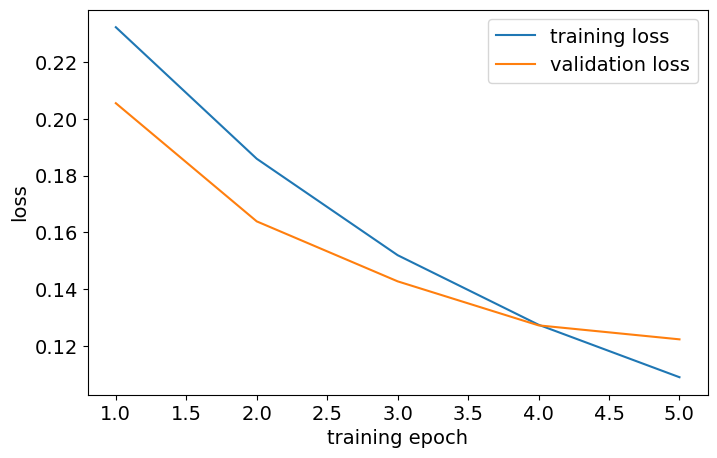

In [34]:
show_stats(stats)

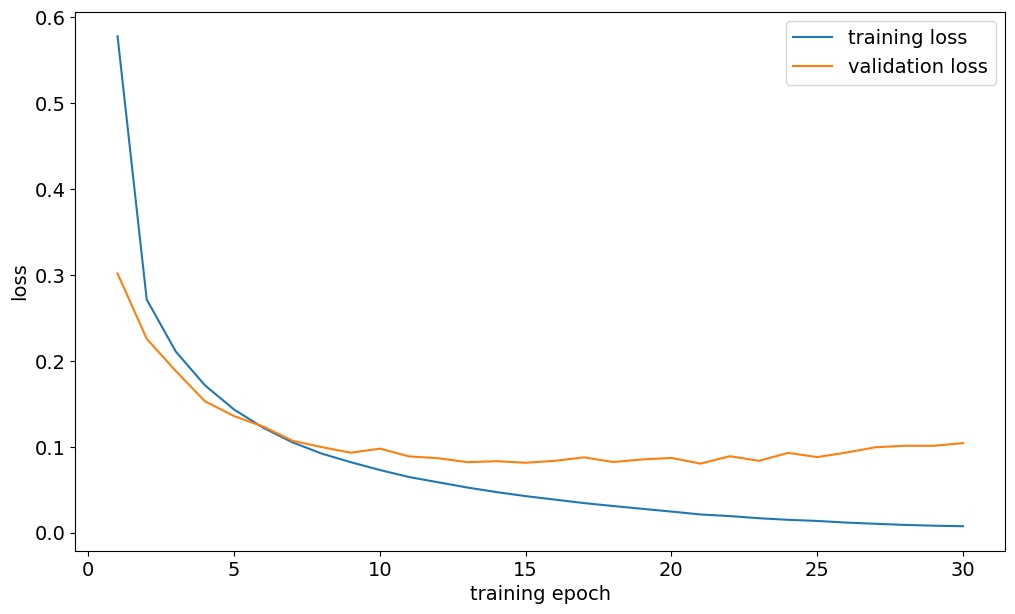

In [24]:
stats_30 = np.load('stats_30.npy', allow_pickle=True).item()
show_stats(stats_30)

# Inference testing

In [35]:
def test_model(model, data_loader):
    total_correct = 0
    mistakes = []
    for i, data in enumerate(data_loader, 0):
        # Get inputs
        inputs, targets = data
        
        outputs = model(inputs)
        
        guesses = torch.argmax(outputs, dim=1)
        num_correct = torch.sum(guesses == targets)
        total_correct += num_correct
        
        if (num_correct != len(targets)): 
            mistake_mask = guesses != targets
            mistake_inputs = inputs[mistake_mask]
            mistake_targets = targets[mistake_mask]
            mistake_outputs = guesses[mistake_mask]
            mistakes.append((mistake_inputs, mistake_targets, mistake_outputs))

    print(f"correct guesses: {total_correct}/{len(data_loader.dataset)} ({total_correct / len(data_loader.dataset) * 100}%)")
    
    return mistakes

In [36]:
def plot_mistake(mistake):
    inputs, targets, outputs = mistake
    plt.imshow(inputs[0][0], cmap="gray")
    plt.title(f"Guess: {outputs[0]}, Actual: {targets[0]}")

def plot_mistakes(mistakes):
    if (len(mistakes) == 0):
        return    
        
    figure = plt.figure(figsize=(12, 7))
    cols, rows = 4, 2
    
    for i in range(1, cols * rows + 1):        
        figure.add_subplot(rows, cols, i)
        sample_idx = torch.randint(len(mistakes), size=(1,)).item()
        
        plot_mistake(mistakes[sample_idx])                
        
    plt.show()

In [37]:
mistakes = test_model(model, test_loader)

correct guesses: 4825/5000 (96.5%)


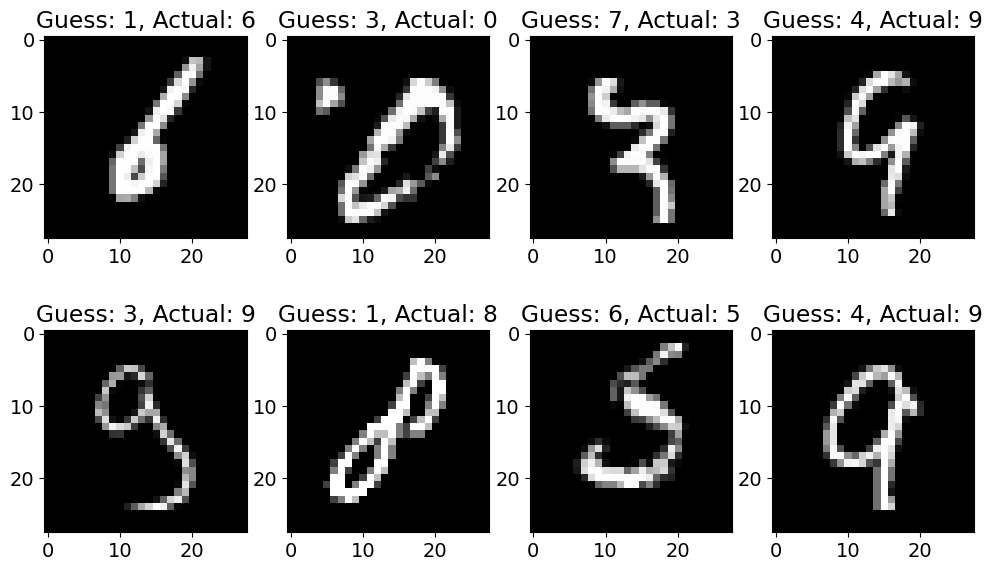

In [39]:
plot_mistakes(mistakes)